In [1]:
import numpy as np
import torch

from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.multi_objective import is_non_dominated
from botorch.test_functions.multi_objective import GMM

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
num_initial_points = 6
num_iterations = 100

In [3]:
def plot_input_space(algo, seed, title):
    output_path = f"data/gmm2_hv/{str(seed).zfill(4)}_{algo}.pt"
    data = torch.load(output_path)
    X = data["X"]
    Y = data["Y"]
    pY = Y[is_non_dominated(Y)]
    pY = pY[pY[:, 0].argsort()]

    n0 = num_initial_points
    n = num_iterations
    colors = pl.cm.viridis(np.linspace(0, 1, n))
    plt.scatter(X[:n0, 0], X[:n0, 1], color="k")
    plt.scatter(X[n0 : n0 + n, 0], X[n0 : n0 + n, 1], c=colors)

    plt.xlabel(r"$x^{(1)}$", fontsize=25)
    plt.ylabel(r"$x^{(2)}$", fontsize=25)
    plt.title(title, fontsize=27)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.yticks([])
    plt.xticks([])

    return None


def plot_output_space(algo, seed, title):
    output_path = f"data/gmm2_hv/{str(seed).zfill(4)}_{algo}.pt"
    data = torch.load(output_path)
    X = data["X"]
    Y = data["Y"]
    pY = Y[is_non_dominated(Y)]
    pY = pY[pY[:, 0].argsort()]

    n0 = num_initial_points
    n = num_iterations
    colors = pl.cm.viridis(np.linspace(0, 1, n))
    plt.scatter(Y[:n0, 0], Y[:n0, 1], color="k")
    plt.scatter(Y[n0 : n0 + n, 0], Y[n0 : n0 + n, 1], c=colors)

    plt.xlabel(r"$y^{(1)}$", fontsize=25)
    plt.ylabel(r"$y^{(2)}$", fontsize=25)
    plt.title(title, fontsize=27)
    plt.xlim(-0.05, 0.8)
    plt.ylim(-0.05, 0.8)
    plt.yticks([])
    plt.xticks([])

    return None

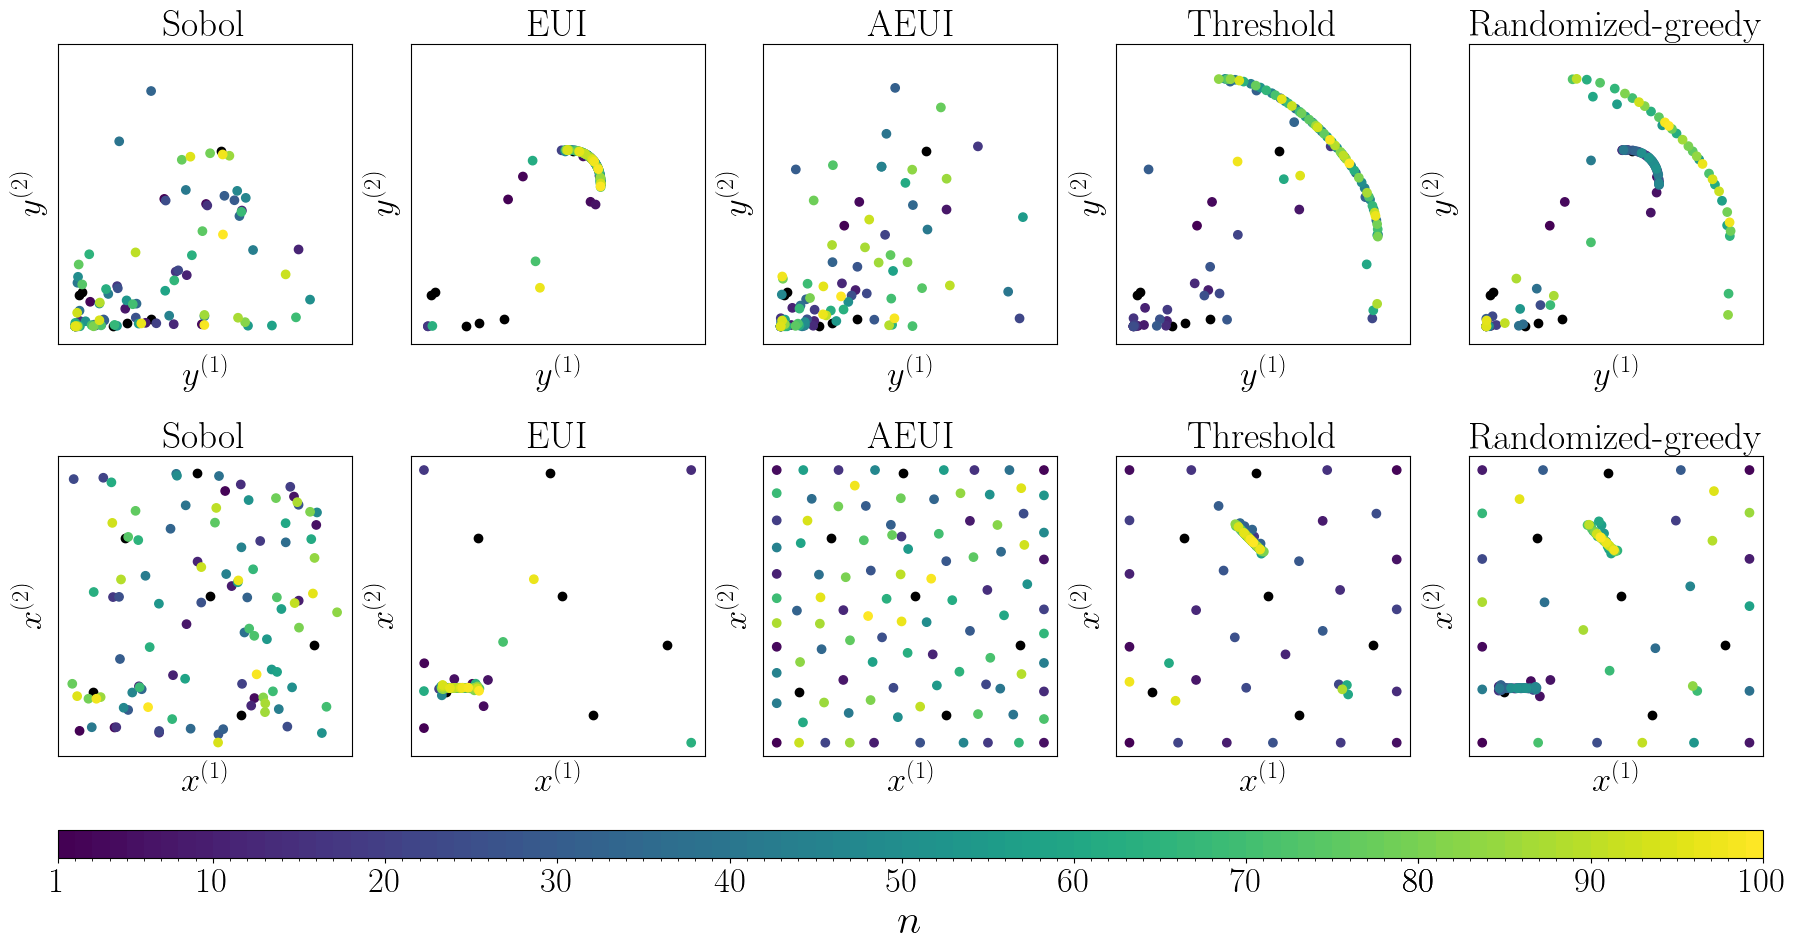

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(22, 9.25))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.375
)
seed = 13

# sobol
plt.subplot(2, 5, 1)
plot_output_space(algo="sobol", title="Sobol", seed=seed)

# eui
plt.subplot(2, 5, 2)
plot_output_space(algo="eui", title="EUI", seed=seed)

# aeui
plt.subplot(2, 5, 3)
plot_output_space(algo="eui-rg-1.0", title="AEUI", seed=seed)

# threshold
plt.subplot(2, 5, 4)
plot_output_space(algo="eui-thresh-0.3", title=r"Threshold", seed=seed)

# epsilon-greedy
plt.subplot(2, 5, 5)
plot_output_space(algo="eui-rg-0.3", title=r"Randomized-greedy", seed=seed)

# sobol
plt.subplot(2, 5, 6)
plot_input_space(algo="sobol", title="Sobol", seed=seed)

# eui
plt.subplot(2, 5, 7)
plot_input_space(algo="eui", title="EUI", seed=seed)

# aeui
plt.subplot(2, 5, 8)
plot_input_space(algo="eui-rg-1.0", title="AEUI", seed=seed)

# threshold
plt.subplot(2, 5, 9)
plot_input_space(algo="eui-thresh-0.3", title=r"Threshold", seed=seed)

# epsilon-greedy
plt.subplot(2, 5, 10)
plot_input_space(algo="eui-rg-0.3", title=r"Randomized-greedy", seed=seed)


cmap = plt.cm.viridis
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "custom cmap", cmaplist, cmap.N
)
bounds = np.linspace(1, 100, 100)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
ax_bar = fig.add_axes([0.125, -0.00, 0.775, 0.03])
cbar = matplotlib.colorbar.ColorbarBase(
    ax_bar,
    cmap=cmap,
    norm=norm,
    spacing="proportional",
    ticks=bounds + 0.5,
    boundaries=bounds,
    format="%1i",
    orientation="horizontal",
)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 80, 90, 100], fontsize=25)
plt.xlabel(r"$n$", fontsize=30)
plt.show()